<a href="https://colab.research.google.com/github/hewansirak/Brain-Tumor-Classification/blob/master/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [7]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [8]:
tr_df = get_class_paths("/content/Training")


In [9]:
tr_df

Class Path       Class
0     /content/Training/meningioma/Tr-me_0239.jpg  meningioma
1     /content/Training/meningioma/Tr-me_0861.jpg  meningioma
2     /content/Training/meningioma/Tr-me_0664.jpg  meningioma
3     /content/Training/meningioma/Tr-me_1026.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0637.jpg  meningioma
...                                           ...         ...
5707      /content/Training/glioma/Tr-gl_0852.jpg      glioma
5708      /content/Training/glioma/Tr-gl_0650.jpg      glioma
5709      /content/Training/glioma/Tr-gl_1062.jpg      glioma
5710      /content/Training/glioma/Tr-gl_0838.jpg      glioma
5711      /content/Training/glioma/Tr-gl_0917.jpg      glioma

[5712 rows x 2 columns]

In [10]:
tr_df.head()

Class Path       Class
0  /content/Training/meningioma/Tr-me_0239.jpg  meningioma
1  /content/Training/meningioma/Tr-me_0861.jpg  meningioma
2  /content/Training/meningioma/Tr-me_0664.jpg  meningioma
3  /content/Training/meningioma/Tr-me_1026.jpg  meningioma
4  /content/Training/meningioma/Tr-me_0637.jpg  meningioma

In [11]:
ts_df = get_class_paths("/content/Testing")

In [12]:
ts_df

Class Path       Class
0     /content/Testing/meningioma/Te-me_0305.jpg  meningioma
1     /content/Testing/meningioma/Te-me_0160.jpg  meningioma
2     /content/Testing/meningioma/Te-me_0070.jpg  meningioma
3     /content/Testing/meningioma/Te-me_0207.jpg  meningioma
4     /content/Testing/meningioma/Te-me_0114.jpg  meningioma
...                                          ...         ...
1306      /content/Testing/glioma/Te-gl_0195.jpg      glioma
1307      /content/Testing/glioma/Te-gl_0221.jpg      glioma
1308      /content/Testing/glioma/Te-gl_0057.jpg      glioma
1309    /content/Testing/glioma/Te-glTr_0008.jpg      glioma
1310      /content/Testing/glioma/Te-gl_0258.jpg      glioma

[1311 rows x 2 columns]

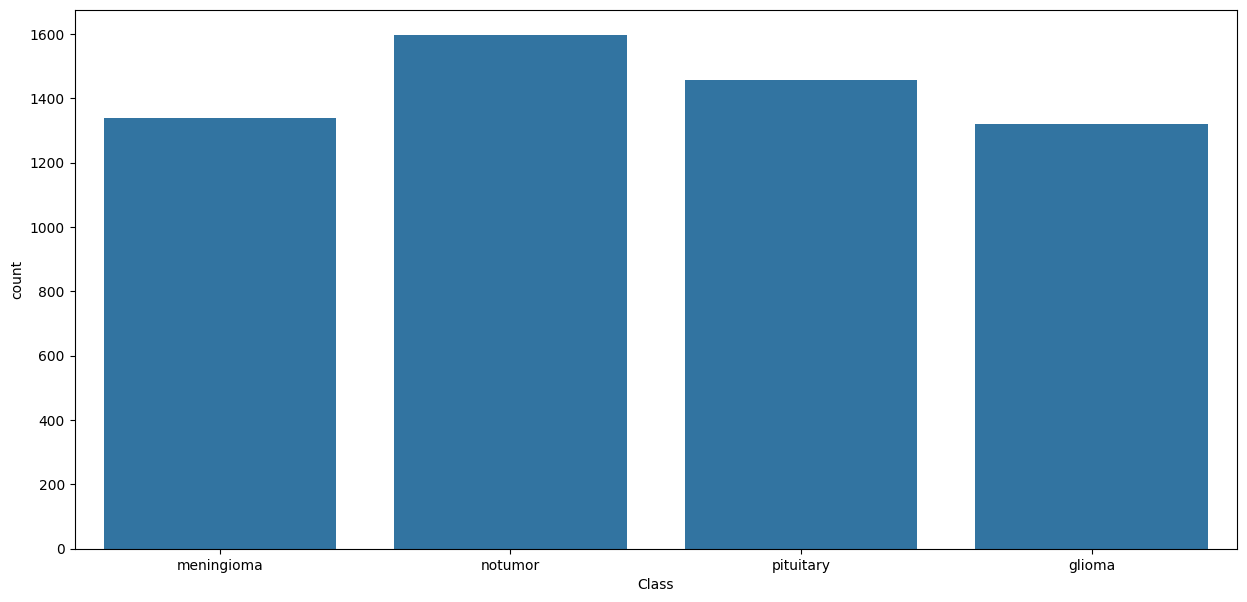

In [13]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

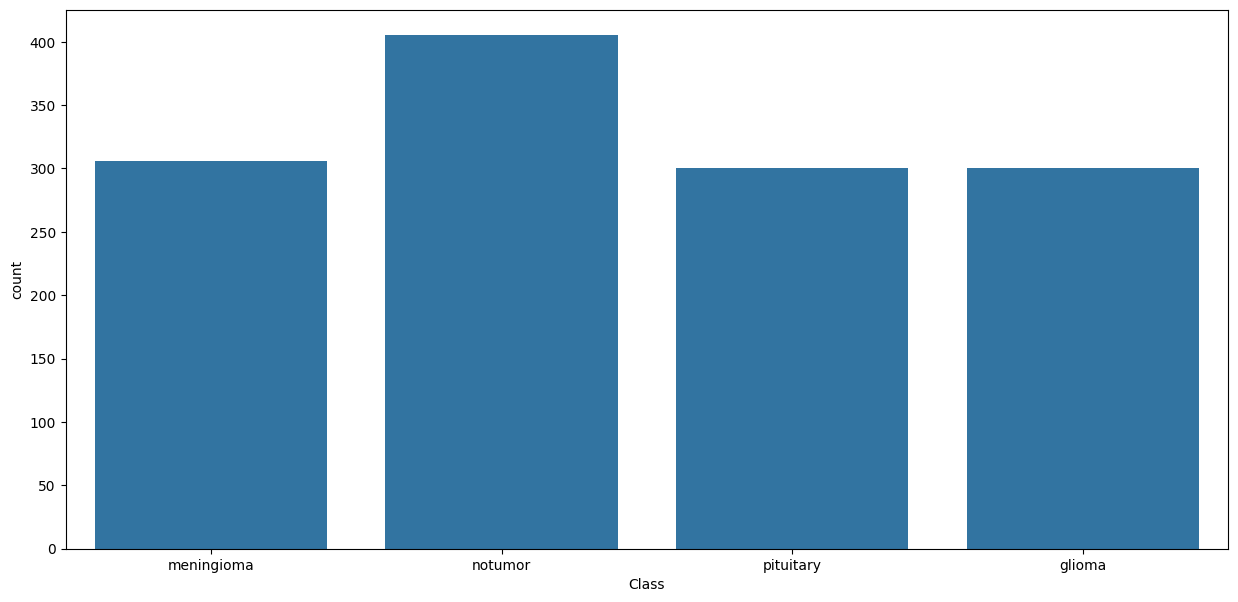

In [14]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.src.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [17]:
valid_df

Class Path       Class
2     /content/Testing/meningioma/Te-me_0070.jpg  meningioma
829    /content/Testing/pituitary/Te-pi_0267.jpg   pituitary
870    /content/Testing/pituitary/Te-pi_0021.jpg   pituitary
1264      /content/Testing/glioma/Te-gl_0181.jpg      glioma
152   /content/Testing/meningioma/Te-me_0295.jpg  meningioma
...                                          ...         ...
889    /content/Testing/pituitary/Te-pi_0193.jpg   pituitary
759    /content/Testing/pituitary/Te-pi_0241.jpg   pituitary
123   /content/Testing/meningioma/Te-me_0263.jpg  meningioma
769    /content/Testing/pituitary/Te-pi_0205.jpg   pituitary
368      /content/Testing/notumor/Te-no_0065.jpg     notumor

[655 rows x 2 columns]

In [18]:
ts_df

Class Path       Class
573    /content/Testing/notumor/Te-noTr_0003.jpg     notumor
1182      /content/Testing/glioma/Te-gl_0206.jpg      glioma
1226      /content/Testing/glioma/Te-gl_0225.jpg      glioma
255   /content/Testing/meningioma/Te-me_0221.jpg  meningioma
914    /content/Testing/pituitary/Te-pi_0086.jpg   pituitary
...                                          ...         ...
732    /content/Testing/pituitary/Te-pi_0209.jpg   pituitary
90    /content/Testing/meningioma/Te-me_0215.jpg  meningioma
536      /content/Testing/notumor/Te-no_0079.jpg     notumor
1266    /content/Testing/glioma/Te-glTr_0001.jpg      glioma
317      /content/Testing/notumor/Te-no_0302.jpg     notumor

[656 rows x 2 columns]

In [19]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [20]:
print(tr_df.columns)

Index(['Class Path', 'Class'], dtype='object')


In [21]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


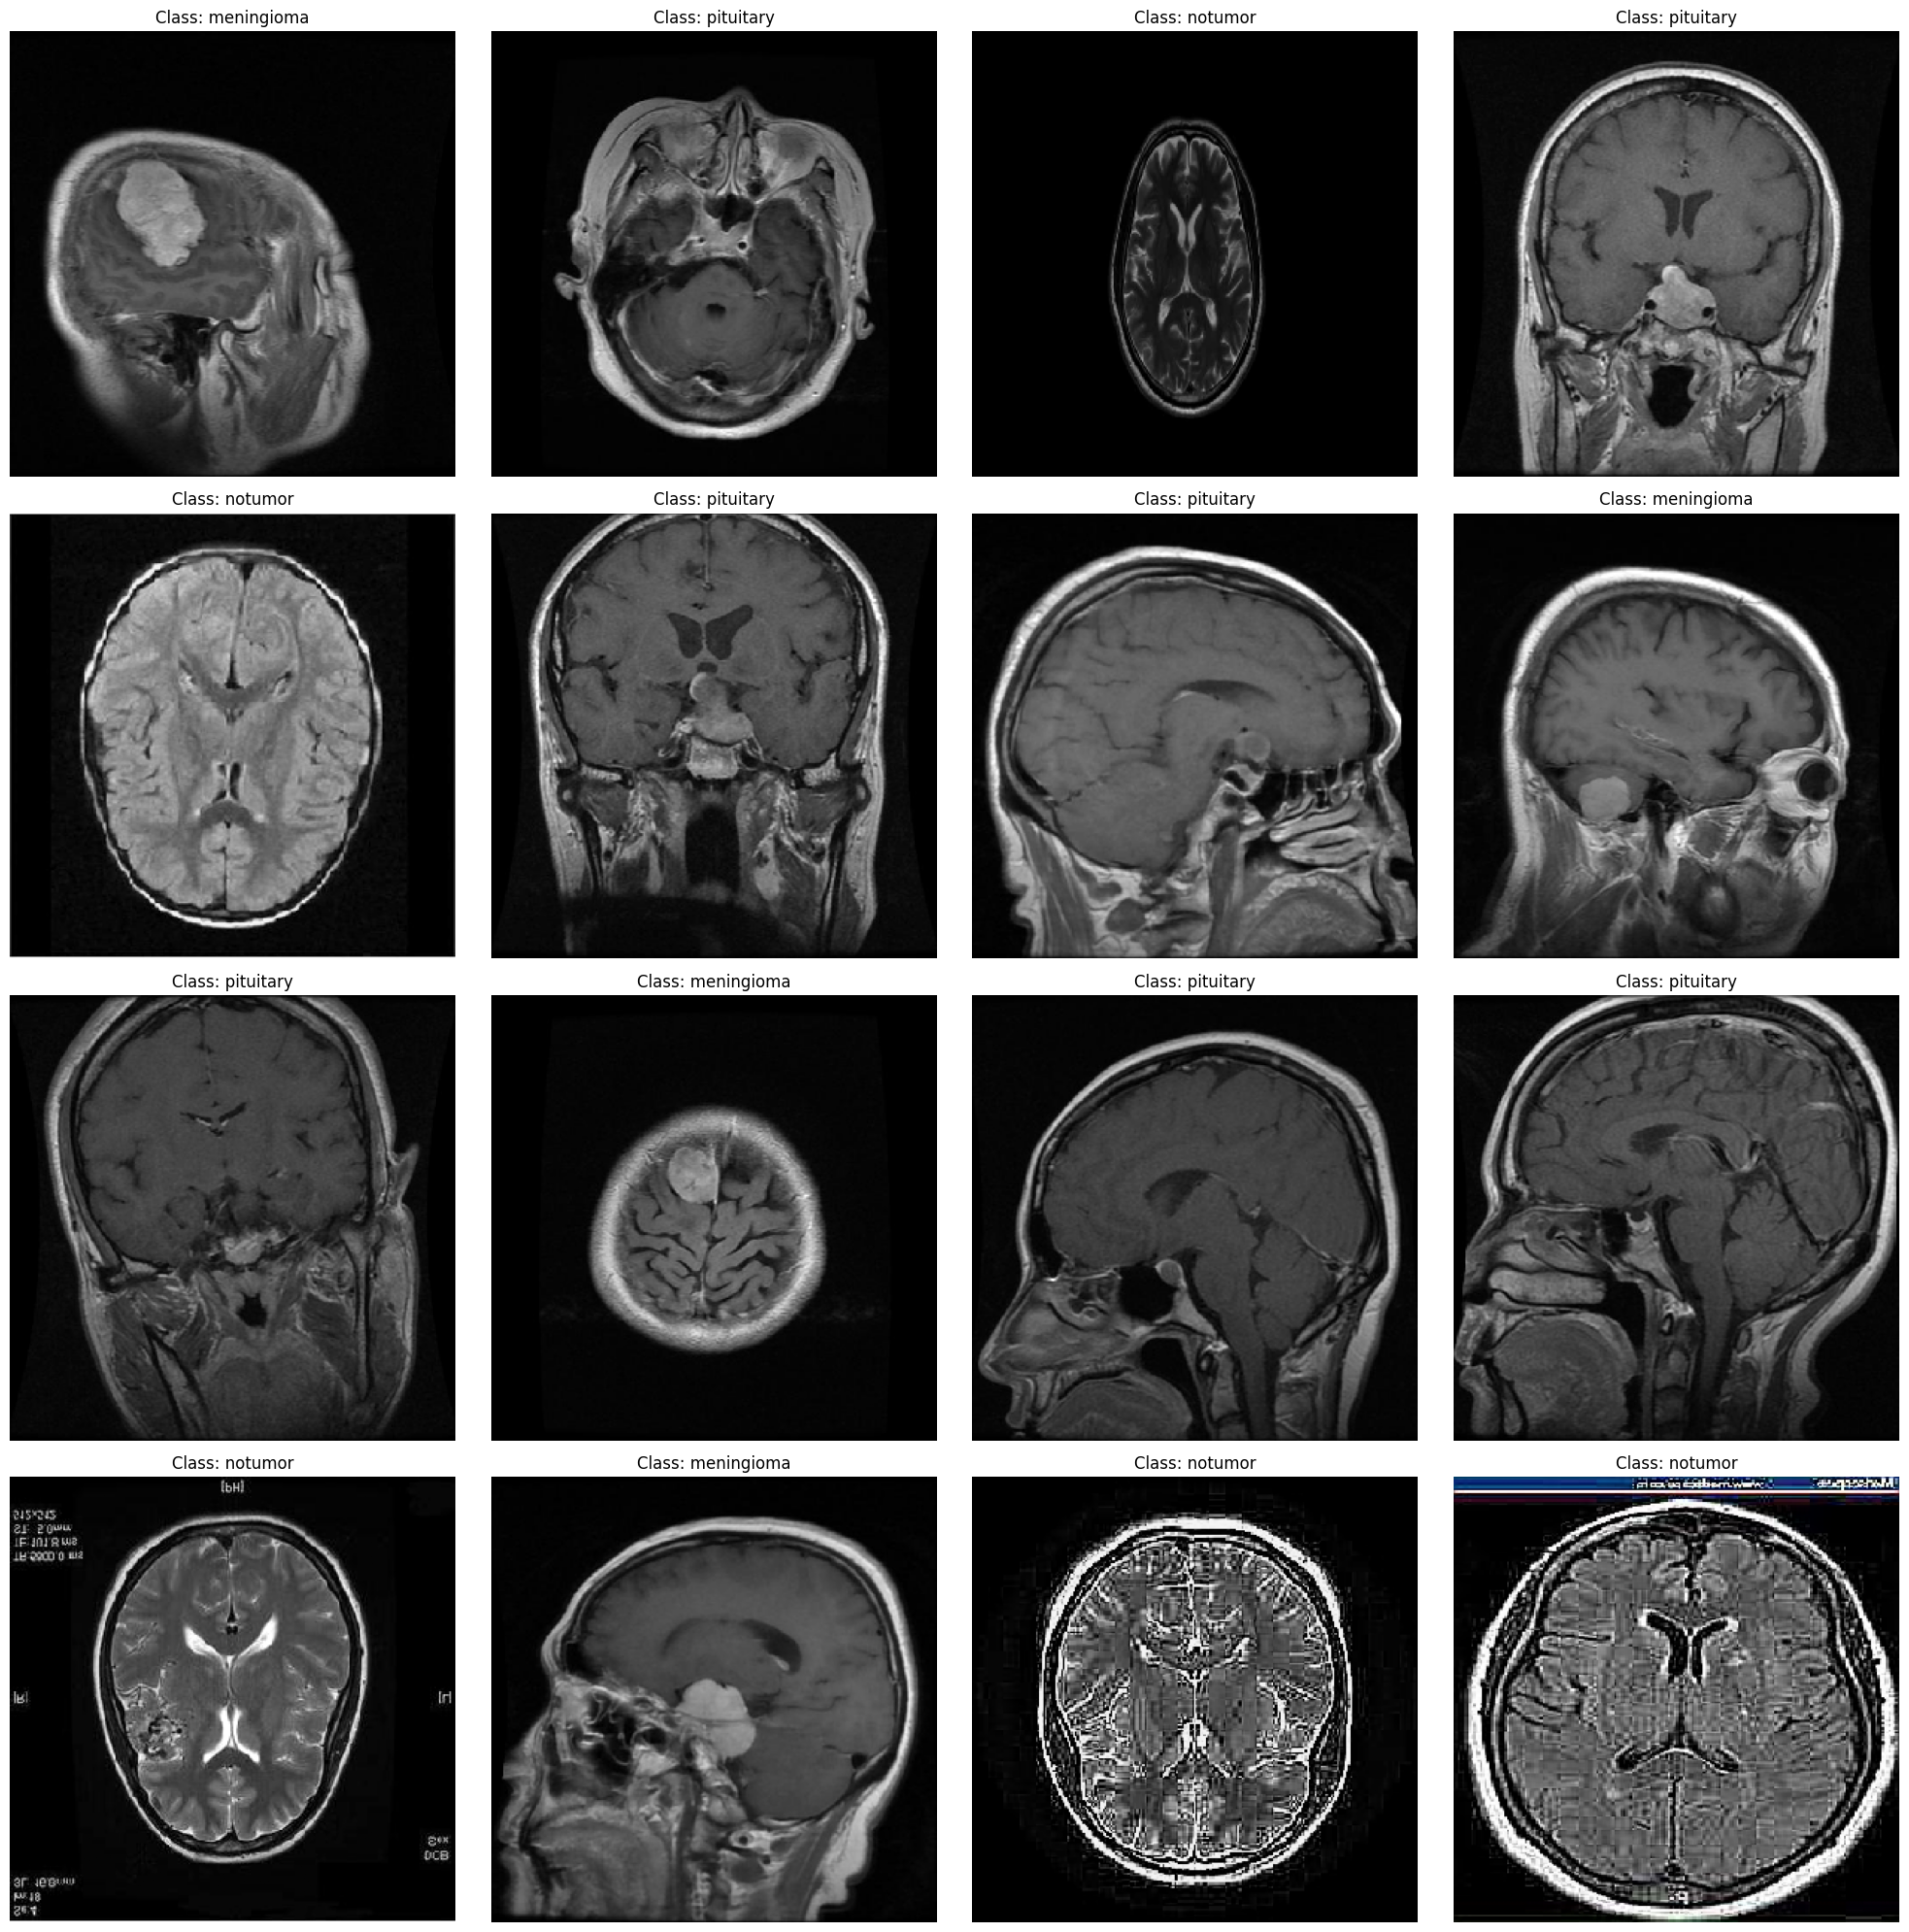

In [22]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indicies = list(tr_gen.class_indices.values())

  index_position = class_indicies.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy", Precision(), Recall()])

In [26]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.7732 - loss: 0.6342 - precision: 0.8384 - recall: 0.6750 - val_accuracy: 0.9084 - val_loss: 0.3120 - val_precision: 0.9191 - val_recall: 0.9023
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 843ms/step - accuracy: 0.9812 - loss: 0.0644 - precision: 0.9822 - recall: 0.9783 - val_accuracy: 0.9802 - val_loss: 0.0629 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 842ms/step - accuracy: 0.9912 - loss: 0.0332 - precision: 0.9912 - recall: 0.9912 - val_accuracy: 0.9878 - val_loss: 0.0402 - val_precision: 0.9893 - val_recall: 0.9878
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 845ms/step - accuracy: 0.9934 - loss: 0.0199 - precision: 0.9942 - recall: 0.9925 - val_accuracy: 0.9893 - val_loss: 0.0407 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9947 - loss: 0.0153 - precision: 0.9947 - recall: 0.9945 - val_accuracy: 0.9908 - 

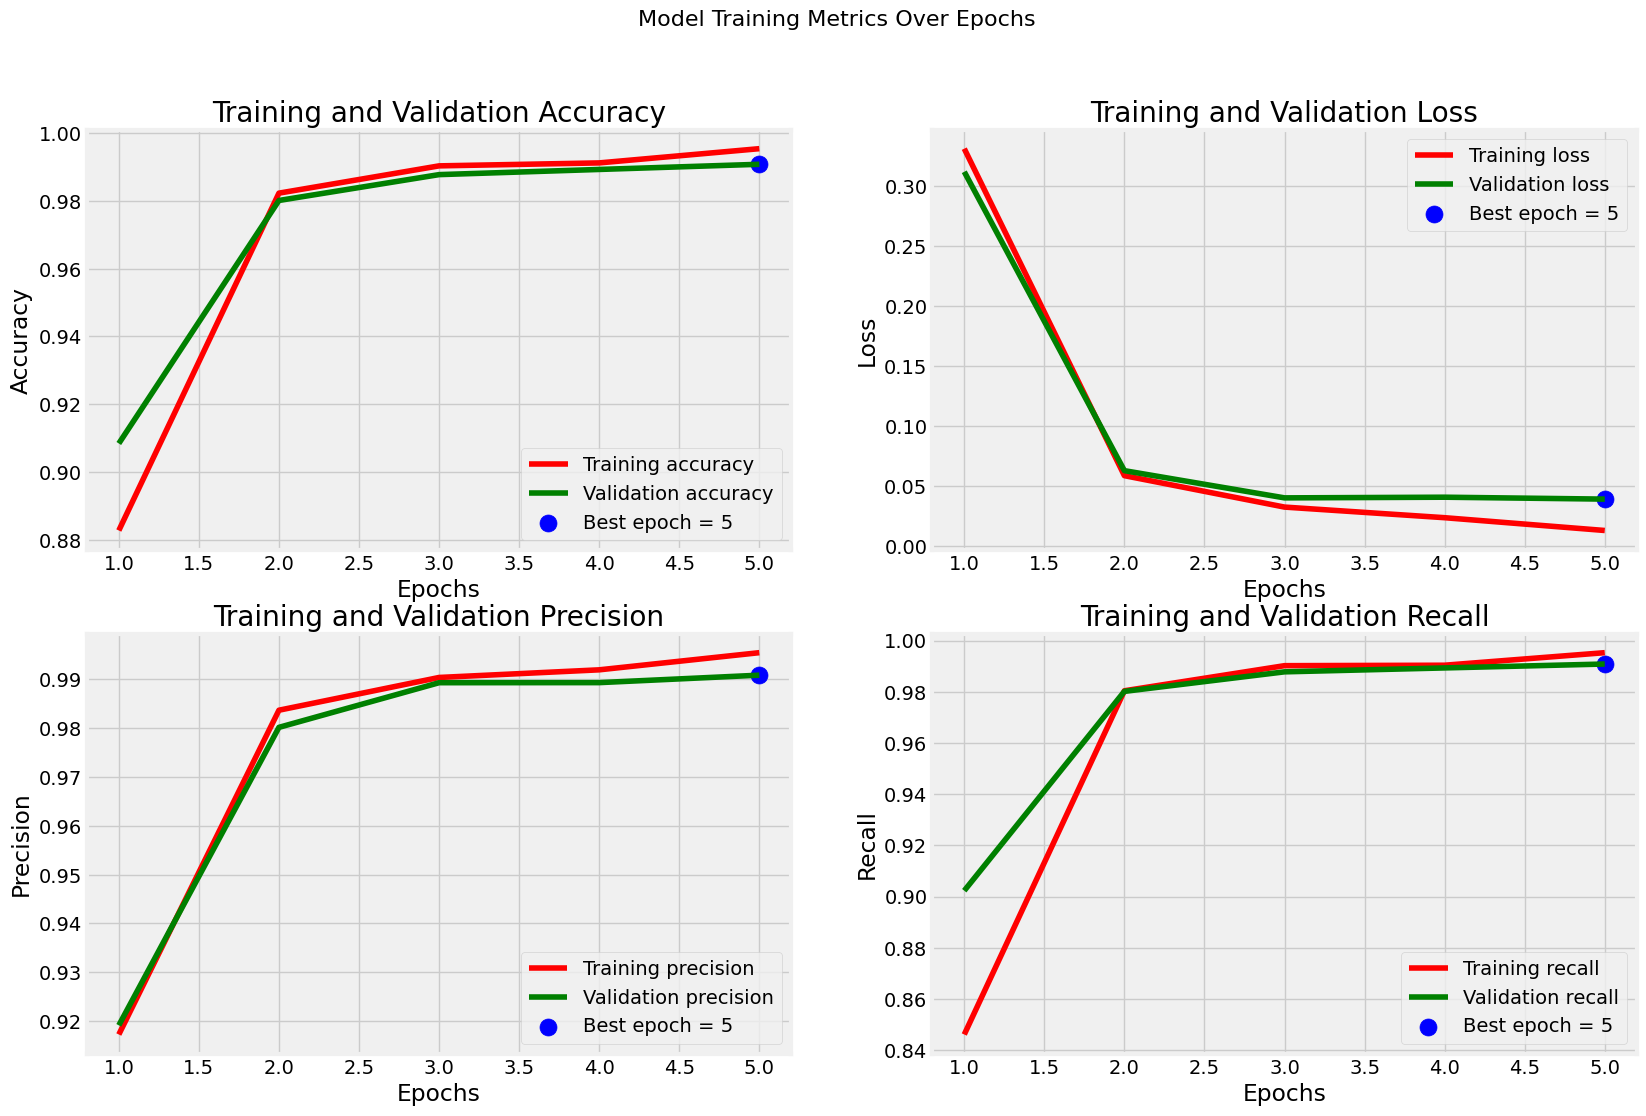

In [27]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [28]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9968 - loss: 0.0058 - precision: 0.9973 - recall: 0.9968
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9893 - loss: 0.0420 - precision: 0.9893 - recall: 0.9893


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9938 - loss: 0.0241 - precision: 0.9938 - recall: 0.9938
Train Accuracy: 99.79%
Train Loss: 0.0050

Validation Accuracy: 98.93%
Validation Loss: 0.0456


Test Accuracy: 99.24%
Test Loss: 0.0384


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step


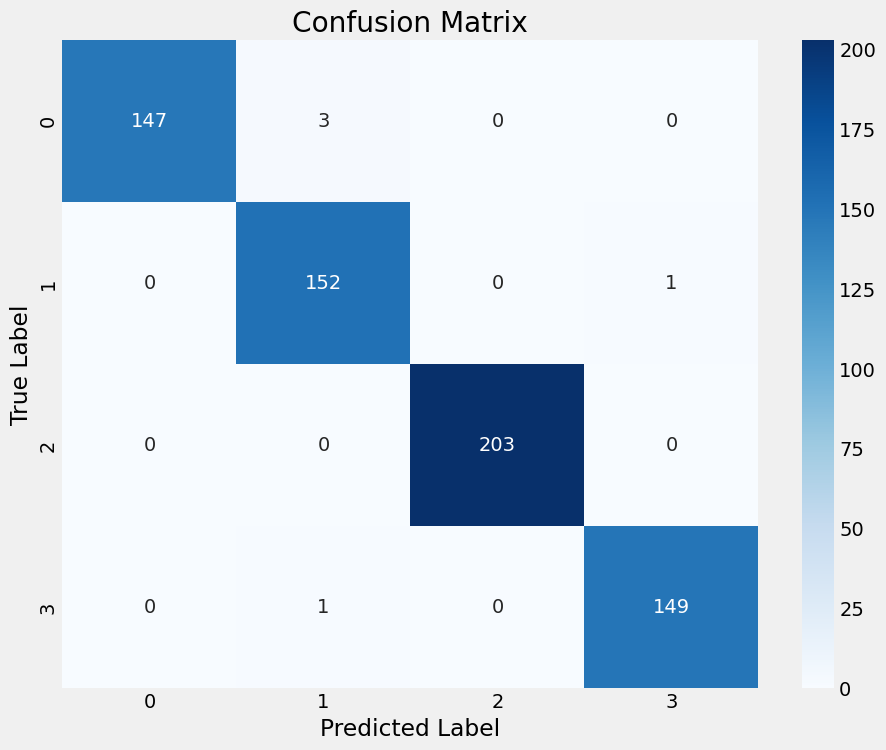

In [29]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from PIL import Image

def predict(img_path: str) -> str:
    labels = list(class_dict.keys())
    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


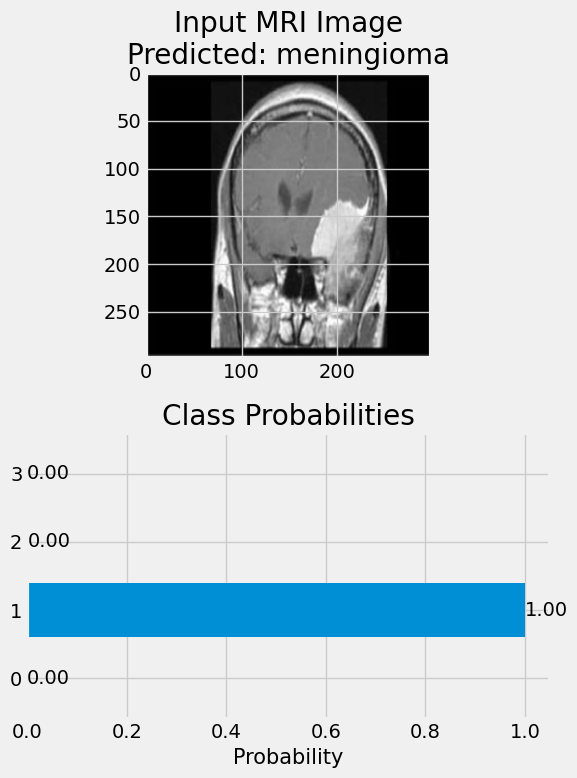


Predicted Tumor Type: meningioma


In [31]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


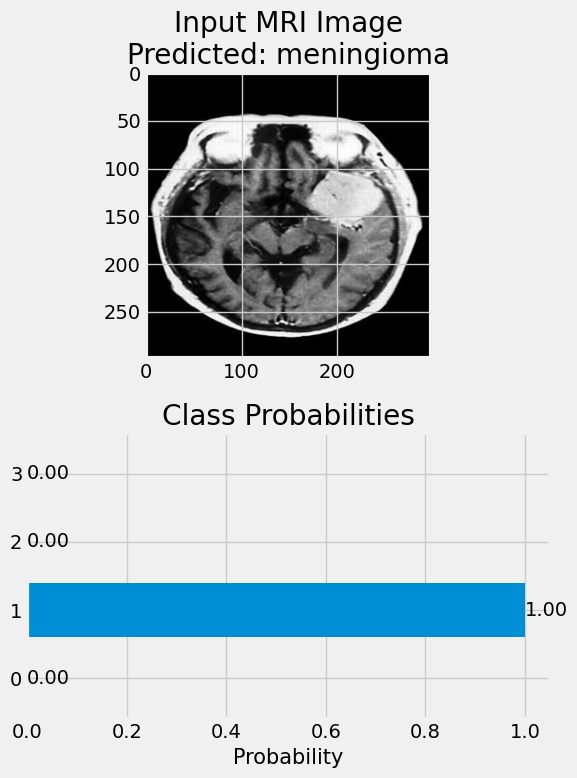


Predicted Tumor Type: meningioma


In [32]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


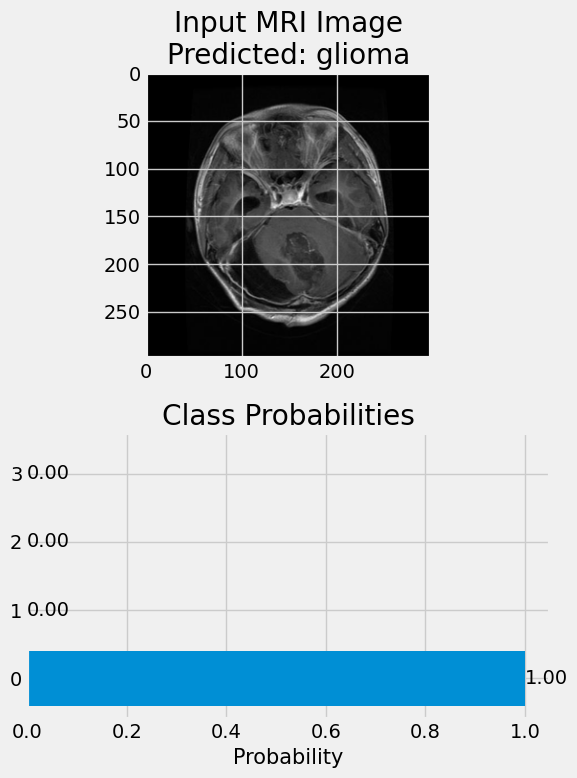


Predicted Tumor Type: glioma


In [33]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


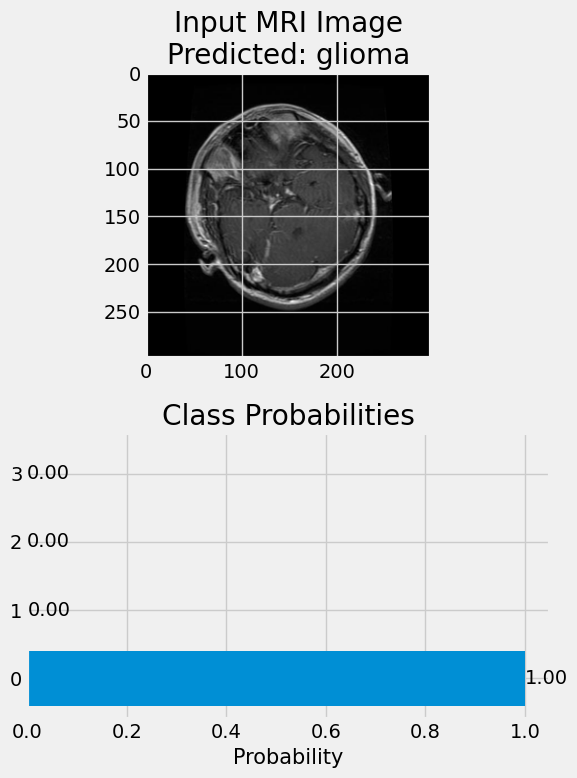


Predicted Tumor Type: glioma


In [34]:
predict("/content/Testing/glioma/Te-glTr_0006.jpg")

In [35]:
model.save_weights("xception_model.weights.h5")

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [37]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [38]:
cnn_model = Sequential()

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]
)
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [40]:
history = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen, callbacks=[early_stopping])

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.5857 - loss: 1.9281 - precision: 0.7057 - recall: 0.4051 - val_accuracy: 0.7252 - val_loss: 0.8878 - val_precision: 0.7624 - val_recall: 0.6565
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 65s 116ms/step - accuracy: 0.8153 - loss: 0.6824 - precision: 0.8403 - recall: 0.7680 - val_accuracy: 0.7939 - val_loss: 0.6455 - val_precision: 0.8197 - val_recall: 0.7634
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.8387 - loss: 0.5745 - precision: 0.8645 - recall: 0.8153 - val_accuracy: 0.8153 - val_loss: 0.5762 - val_precision: 0.8336 - val_recall: 0.7878
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.8801 - loss: 0.4791 - precision: 0.8924 - recall: 0.8648 - val_accuracy: 0.8748 - val_loss: 0.4743 - val_precision: 0.8831 - val_recall: 0.8534
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.9111 - loss: 0.3934 - precision: 0.9174 - recall: 0.9002 - val_accuracy: 0.8748 - val_loss: 0.

In [41]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


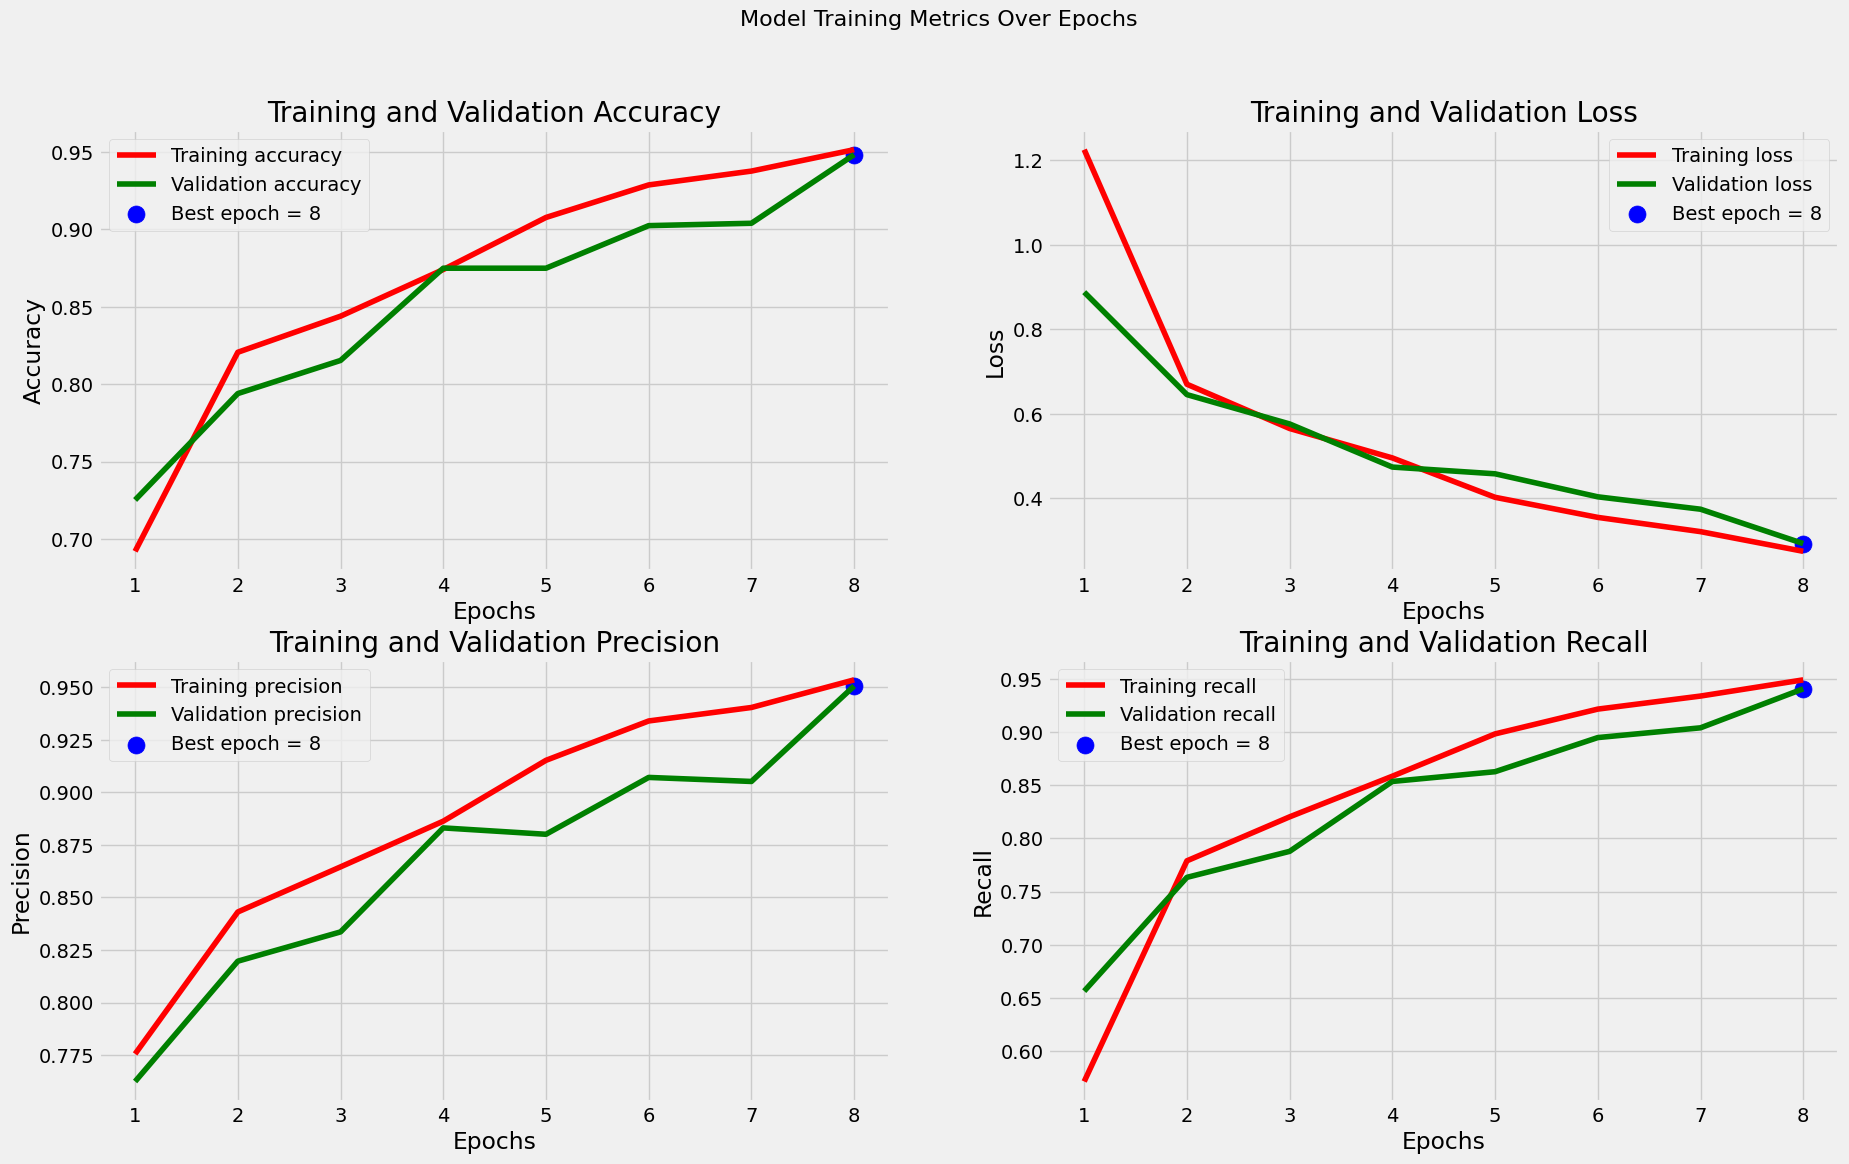

In [42]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [43]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9783 - loss: 0.1981 - precision: 0.9786 - recall: 0.9774
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9353 - loss: 0.3255 - precision: 0.9400 - recall: 0.9236
 1/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 0.2099 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9472 - loss: 0.3019 - precision: 0.9525 - recall: 0.9439
Train Accuracy: 98.00%
Train Loss: 0.1974

Validation Accuracy: 94.20%
Validation Loss: 0.2984


Test Accuracy: 93.90%
Test Loss: 0.2809


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


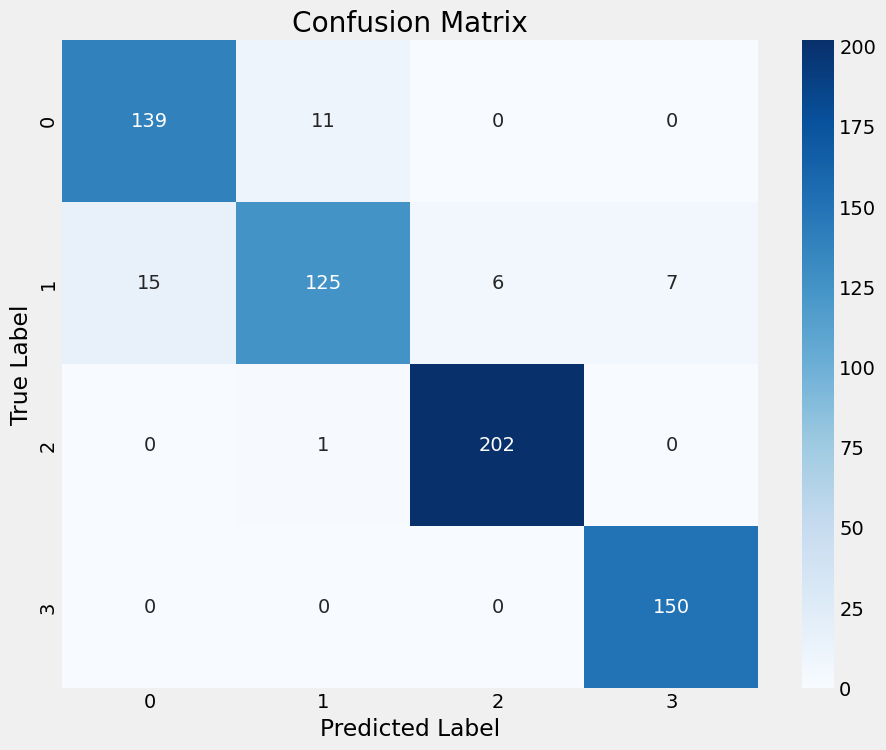

In [44]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       150
           1       0.91      0.82      0.86       153
           2       0.97      1.00      0.98       203
           3       0.96      1.00      0.98       150

    accuracy                           0.94       656
   macro avg       0.94      0.93      0.93       656
weighted avg       0.94      0.94      0.94       656



In [46]:
cnn_model.save("cnn_model.h5")

Streamlit Web App

In [47]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [48]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [49]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [50]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [51]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key = os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir , exist_ok=True)


def generate_explanation(img_path , model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.
    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Start with "This MRI Scan shows that these person is diagnosed from {model_prediction} due to ...." explain in scientific terms and what it e
    - Explain what regions of the brain the model is focusing on so that you know what it focused on to predict these
      Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did
    - DO NOT mention "This model focusess on ..." or anything about the model
    - Talk like a neuro scientist using scientific terms
    - Keep your explanations to 5 sentence maximum

    Let's think step by step about this. Verify step by step.

  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

def load_xception_model(model_path):
  img_shape = (299,299,3)

  base_model = tf.keras.applications.Xception(
      include_top = False,
      weights = 'imagenet',
      input_shape = img_shape,
      pooling = 'max'
  )

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate = 0.3),
      Dense(128, activation = 'relu'),
      Dropout(rate = 0.25),
      Dense(4, activation = 'softmax')
  ])

  model.build((None,)+img_shape)

  model.compile(Adamax(learning_rate= 0.001),
              loss = 'categorical_crossentropy',
              metrics = [
                  'accuracy',
                  Precision(),
                  Recall()
              ])
  model.load_weights(model_path)

  return model


st.title('Brain Tumor Classification')
st.write('Upload an MRI scan to classify')

uploaded_file = st.file_uploader("Choose an Image....." , type=["jpg","jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception" , "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)


  labels = ['Glioma', 'Meningioma' , 'No Tumor' , 'Pituitary']
  img = image.load_img(uploaded_file, target_size = img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array , axis =0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f'Predicted Class: {result}')
  st.write('Predictions: ')
  for label,prob in zip (labels,prediction[0]):
    st.write(f"{label}: {prob*100:.2f}%")

  saliency_map = generate_saliency_map(model , img_array, class_index, img_size)

  col1,col2 = st.columns(2)
  with col1:
    st.image(uploaded_file,caption = "Uploaded Image" , use_container_width = True)
  with col2:
    st.image(saliency_map, caption = "Saliency Map" , use_container_width = True)


  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
     f"""



                  Prediction

                      {result}




                  Confidence

                      {prediction[0][class_index]:.4%}




      """,
      unsafe_allow_html=True
  )

  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  fig. update_layout(
    title='Probabilities for each class',
    xaxis_title='Probability',
    yaxis_title='Class',
    height=400,
    width=600,
    yaxis=dict (autorange="reversed"))

  for i, prob in enumerate(sorted_probabilities):
    fig. add_annotation(
      x=prob,
      y=1,
      text=f'{prob:.4f}',
      showarrow=False,
      xanchor='left',
      xshift=5)

  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)

Writing app.py


In [52]:
thread = Thread(target=run_streamlit)
thread.start()

In [55]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://8244-34-125-130-161.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# tunnels = ngrok.get_tunnels()
# for tunnel in tunnels:
#   print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#   ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://b62e-34-91-111-12.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://a726-34-91-111-12.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://394f-34-91-111-12.ngrok-free.app -> http://localhost:8501


In [54]:
%%writefile .env



Writing .env
